In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [143]:
# 1) Use Random Forest to prepare a model on fraud data
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [144]:
df1=pd.read_csv('/content/Fraud_check.csv')
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [145]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [146]:
df1.shape

(600, 6)

In [147]:
df1.size

3600

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [149]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [150]:
df1.duplicated().any()

False

In [151]:
lab_enc=LabelEncoder()

In [152]:
df1['Marital.Status']=lab_enc.fit_transform(df1['Marital.Status'])
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,2,68833,50047,10,YES
1,YES,0,33700,134075,18,YES
2,NO,1,36925,160205,30,YES
3,YES,2,50190,193264,15,YES
4,NO,1,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,0,76340,39492,7,YES
596,YES,0,69967,55369,2,YES
597,NO,0,47334,154058,0,YES
598,YES,1,98592,180083,17,NO


In [153]:
df1 = pd.get_dummies(df1, columns=['Undergrad','Urban'],drop_first=True).astype(int)
df1

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,2,68833,50047,10,0,1
1,0,33700,134075,18,1,1
2,1,36925,160205,30,0,1
3,2,50190,193264,15,1,1
4,1,81002,27533,28,0,0
...,...,...,...,...,...,...
595,0,76340,39492,7,1,1
596,0,69967,55369,2,1,1
597,0,47334,154058,0,0,1
598,1,98592,180083,17,1,0


In [154]:
df1['Taxable.Income'] = df1['Taxable.Income'].apply(lambda features: 'Risky' if features <= 30000 else 'Good')
df1

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,2,Good,50047,10,0,1
1,0,Good,134075,18,1,1
2,1,Good,160205,30,0,1
3,2,Good,193264,15,1,1
4,1,Good,27533,28,0,0
...,...,...,...,...,...,...
595,0,Good,39492,7,1,1
596,0,Good,55369,2,1,1
597,0,Good,154058,0,0,1
598,1,Good,180083,17,1,0


In [155]:
df1['Taxable.Income']=lab_enc.fit_transform(df1['Taxable.Income'])
df1

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,2,0,50047,10,0,1
1,0,0,134075,18,1,1
2,1,0,160205,30,0,1
3,2,0,193264,15,1,1
4,1,0,27533,28,0,0
...,...,...,...,...,...,...
595,0,0,39492,7,1,1
596,0,0,55369,2,1,1
597,0,0,154058,0,0,1
598,1,0,180083,17,1,0


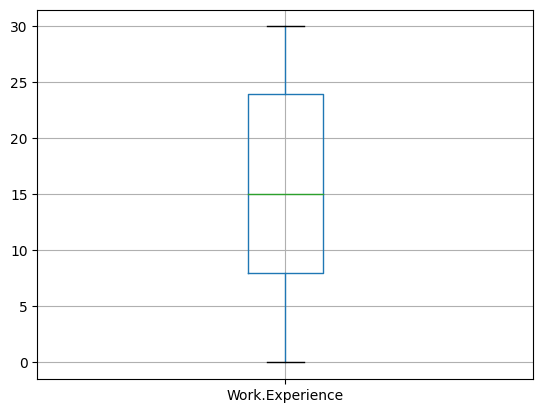

In [156]:
df1.boxplot('Work.Experience')
plt.show()

In [157]:
target1=df1[['Taxable.Income']]
target1

,Taxable.Income
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [158]:
features1=df1.drop('Taxable.Income',axis=1)
features1

,Marital.Status,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,2,50047,10,0,1
1,0,134075,18,1,1
2,1,160205,30,0,1
3,2,193264,15,1,1
4,1,27533,28,0,0
...,...,...,...,...,...
595,0,39492,7,1,1
596,0,55369,2,1,1
597,0,154058,0,0,1
598,1,180083,17,1,0


In [159]:
features1.isnull().sum()

Marital.Status     0
City.Population    0
Work.Experience    0
Undergrad_YES      0
Urban_YES          0
dtype: int64

In [160]:
x_train1,x_test1,y_train1,y_test1=train_test_split(features1,target1,train_size=0.75,random_state=30)

In [161]:
x_train1.isnull().sum()

Marital.Status     0
City.Population    0
Work.Experience    0
Undergrad_YES      0
Urban_YES          0
dtype: int64

In [162]:
x_test1.isnull().sum()

Marital.Status     0
City.Population    0
Work.Experience    0
Undergrad_YES      0
Urban_YES          0
dtype: int64

In [163]:
std_sca=StandardScaler()

In [164]:
x_train1=std_sca.fit_transform(x_train1)

In [165]:
x_test1=std_sca.transform(x_test1)

In [166]:
smote1=SMOTE(random_state=30)

In [167]:
x_sampled1,y_sampled1=smote1.fit_resample(x_train1,y_train1)

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
rand_forest1=RandomForestClassifier()

In [170]:
params={'n_estimators':[50,100,150,200,250,300],'max_depth':[1,2,3,4,5,6,7],'min_samples_split':[2,3,4,5,6,7]}

In [171]:
grid_search1=GridSearchCV(rand_forest1,params)

In [172]:
grid_search1.fit(x_sampled1,y_sampled1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [173]:
grid_search1.best_params_

{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 50}

In [174]:
rand_forest1=RandomForestClassifier(n_estimators=50,max_depth=2,min_samples_split=2)

In [175]:
rand_forest1.fit(x_sampled1,y_sampled1)

<ipython-input-175-8be9be330526>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest1.fit(x_sampled1,y_sampled1)


RandomForestClassifier(max_depth=2, n_estimators=50)

In [176]:
y_pred1=rand_forest1.predict(x_sampled1)

In [177]:
accuracy_score(y_sampled1,y_pred1)

0.66991643454039

In [178]:
kfold1=KFold(n_splits=5,shuffle=True)

In [179]:
for train_split, test_split in kfold1.split(features1):
    print(train_split,test_split)

[  0   1   3   4   5   6   7   8   9  11  12  14  16  17  18  19  21  22
  23  24  25  27  28  29  30  32  33  34  35  36  37  41  42  43  44  47
  48  49  50  51  52  54  56  57  59  60  62  64  65  66  67  68  69  71
  72  73  74  75  76  78  79  80  82  84  85  86  87  88  89  90  92  95
  96  97  99 100 101 102 103 107 108 110 111 112 113 114 116 117 118 119
 120 122 124 125 126 127 128 129 130 133 135 136 139 140 142 144 145 146
 147 149 150 151 152 155 156 158 164 165 166 167 168 169 171 172 173 175
 176 177 178 179 180 181 182 183 184 185 187 188 189 190 191 192 193 194
 195 196 197 198 199 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 221 222 223 224 226 227 228 229 230 232 234 235 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 253 254 256 257
 258 259 260 261 262 263 264 265 266 267 269 270 271 272 273 274 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 297 298 299 300 301 302 303 304 305 308 309 310 31

In [180]:
cross_val_score(rand_forest1,features1,target1,scoring='accuracy',cv=kfold1,n_jobs=None).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.7933333333333332

##### Bagging

In [181]:
from sklearn.ensemble import BaggingClassifier

In [182]:
bag_clas1=BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=50,bootstrap=True)

In [183]:
bag_clas1.fit(x_sampled1,y_sampled1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50)

In [184]:
y_pred1=bag_clas1.predict(x_sampled1)
y_pred1

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,

In [185]:
accuracy_score(y_sampled1,y_pred1)

0.9860724233983287

##### Boosting

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

In [187]:
grad_boost1=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,subsample=1.0)

In [188]:
grad_boost1.fit(x_sampled1,y_sampled1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [189]:
y_pred1=grad_boost1.predict(x_sampled1)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [190]:
accuracy_score(y_sampled1,y_pred1)

0.8662952646239555

In [191]:
conf1=confusion_matrix(y_sampled1,y_pred1)
conf1

array([[326,  33],
       [ 63, 296]])

In [192]:
print(classification_report(y_sampled1,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       359
           1       0.90      0.82      0.86       359

    accuracy                           0.87       718
   macro avg       0.87      0.87      0.87       718
weighted avg       0.87      0.87      0.87       718



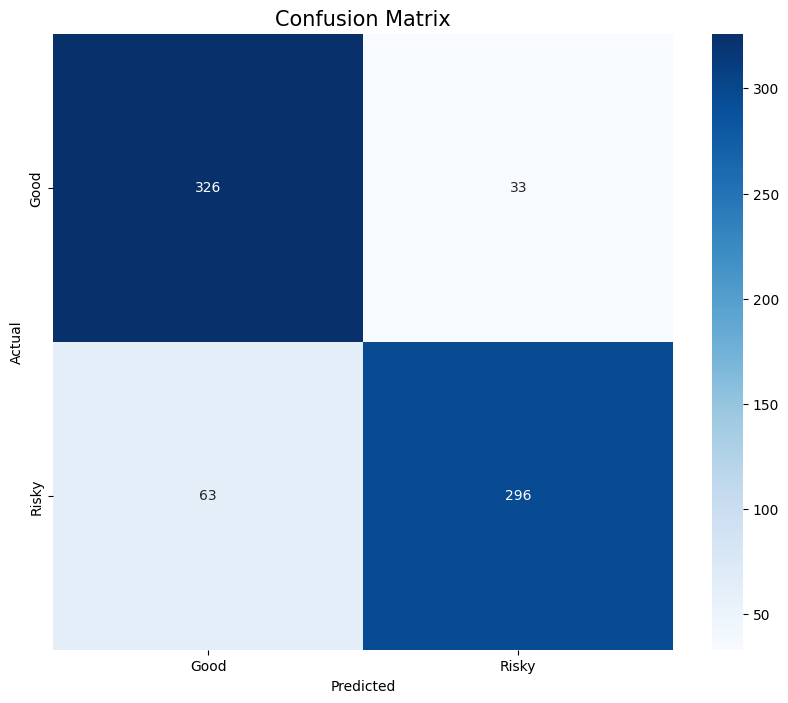

In [193]:
labels=['Good','Risky']
plt.figure(figsize=(10,8))
sns.heatmap(conf1,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted',size=10)
plt.ylabel('Actual',size=10)
plt.title('Confusion Matrix',size=15)
plt.show();

In [194]:
rand_forest1.estimators_

[DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1368036877),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=777898229),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=292642309),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=173036176),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=256801253),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=640229842),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=451405305),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1747724624),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1406659770),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1623594661),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
            

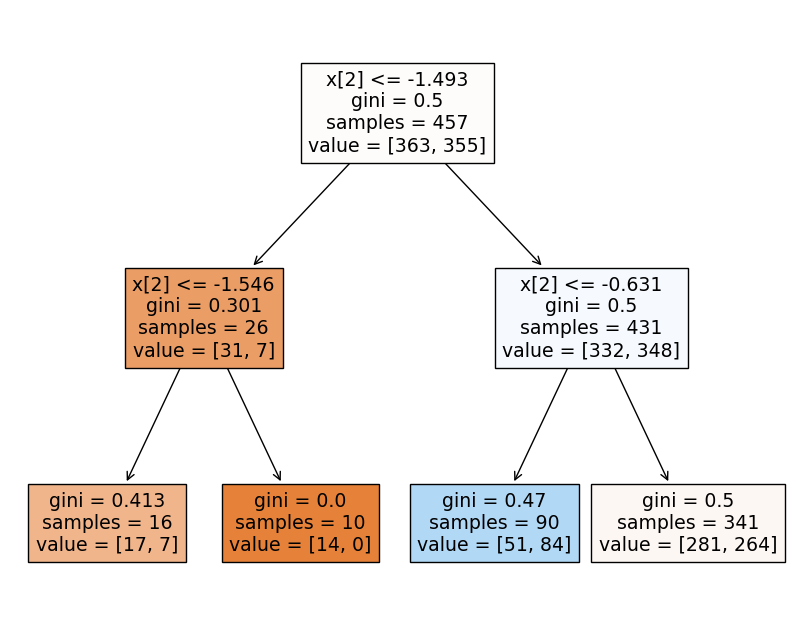

In [195]:
plt.figure(figsize=(10,8))
tree.plot_tree(rand_forest1.estimators_[1],filled=True)
plt.show()

### ROC Curve

In [196]:
fpr,tpr,thresholds=roc_curve(y_sampled1,y_pred1)
roc_auc_score(y_sampled1,y_pred1)

0.8662952646239555

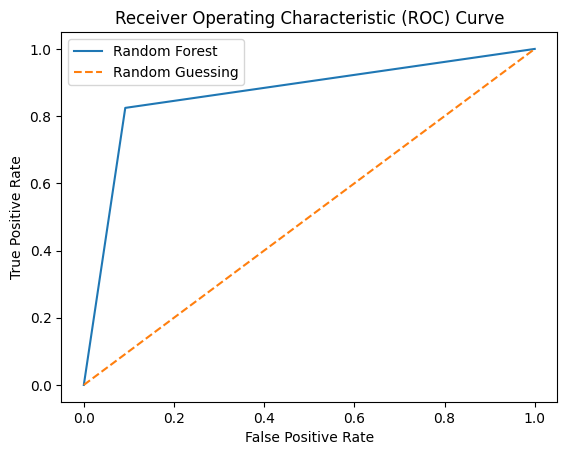

In [197]:
plt.plot(fpr,tpr,label='Random Forest')
plt.plot([0, 1],[0, 1],'--',label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

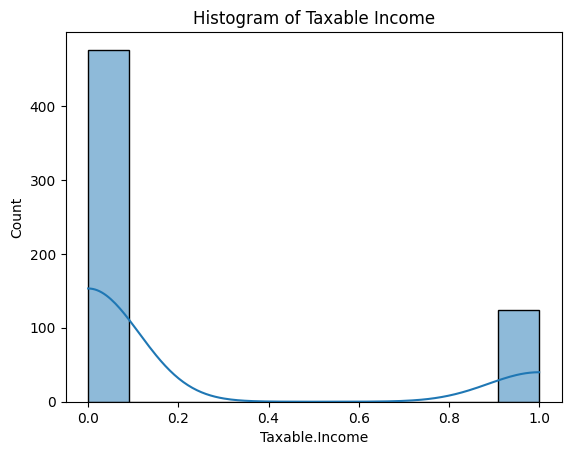

In [198]:
# Histogram
sns.histplot(df1['Taxable.Income'],kde=True)
plt.title('Histogram of Taxable Income')
plt.show()

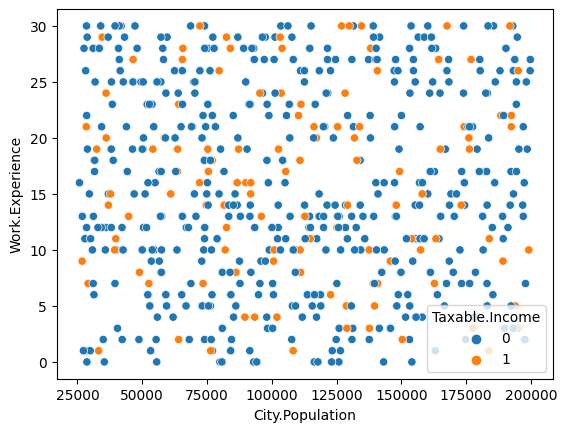

In [199]:
# Scatter plot
sns.scatterplot(data=df1,x='City.Population',y='Work.Experience',hue='Taxable.Income')
plt.show()

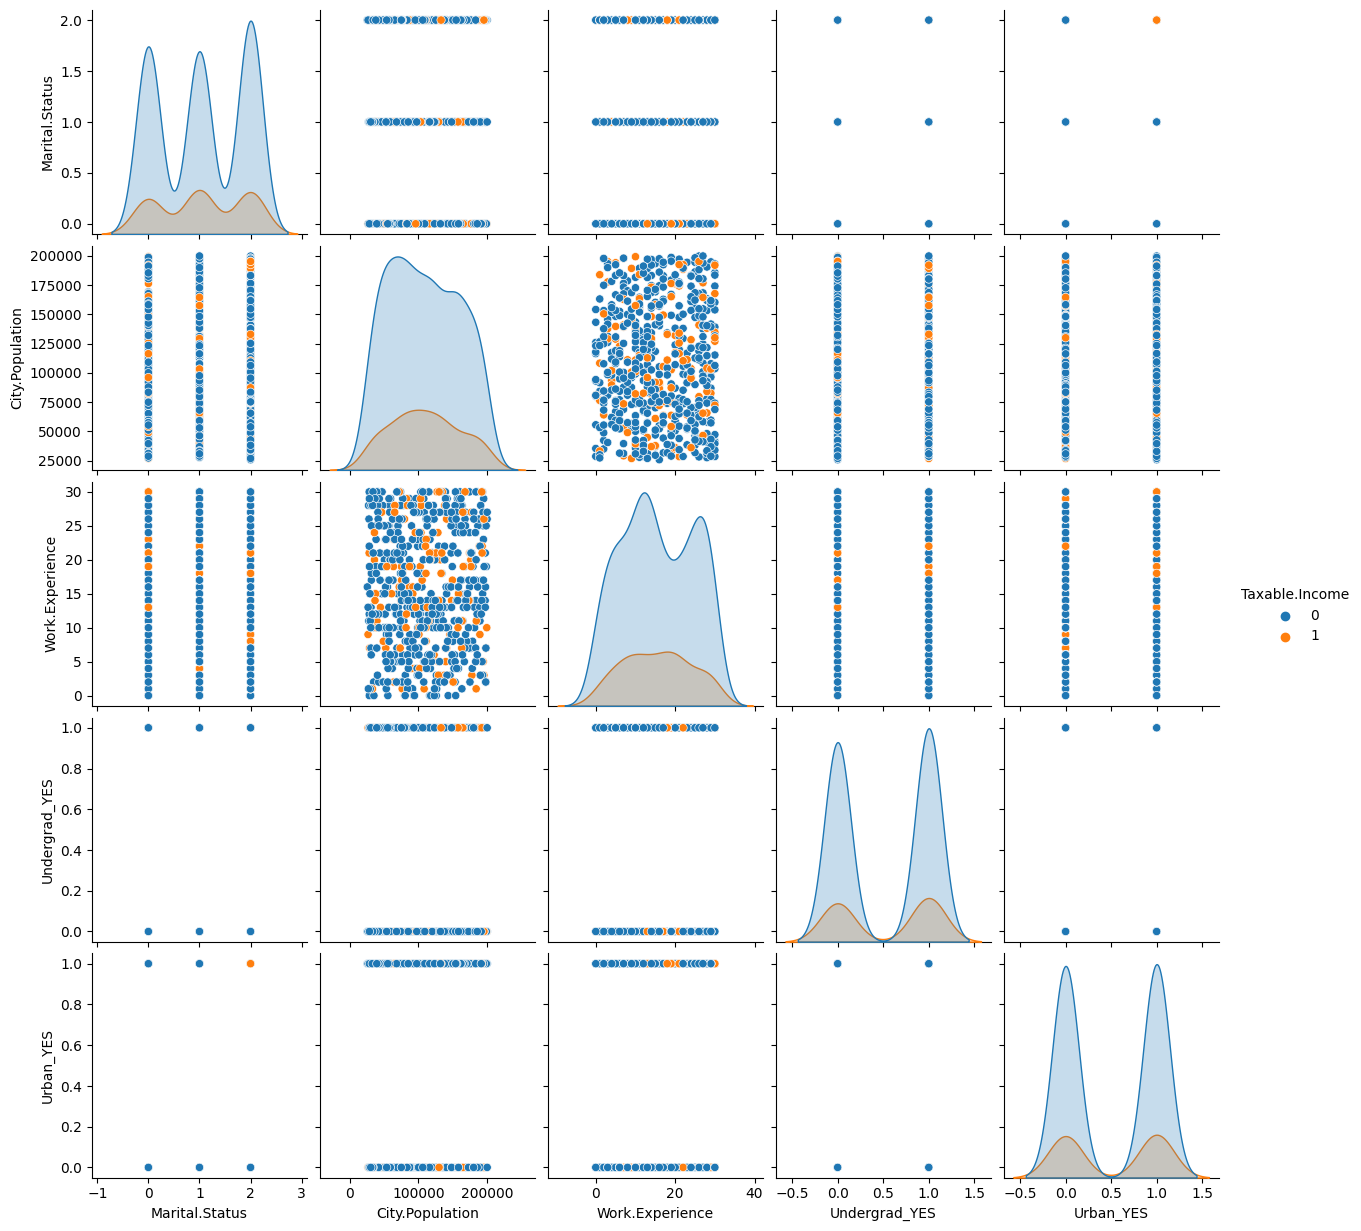

In [200]:
# Pairplot
sns.pairplot(df1,hue='Taxable.Income')
plt.show()

In [202]:
# 2) Random Forest

# Assignment


# About the data:
# Let’s consider a Company dataset with around 10 variables and 400 records.
# The attributes are as follows:
# Sales -- Unit sales (in thousands) at each location
# Competitor Price -- Price charged by competitor at each location
# Income -- Community income level (in thousands of dollars)
# Advertising -- Local advertising budget for company at each location (in thousands of dollars)
# Population -- Population size in region (in thousands)
# Price -- Price company charges for car seats at each site
# Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
# Age -- Average age of the local population
# Education -- Education level at each location
# Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
# US -- A factor with levels No and Yes to indicate whether the store is in the US or not
# The company dataset looks like this:

# Problem Statement:
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
# Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [203]:
df2=pd.read_csv('/content/Company_Data.csv')
df2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [204]:
lab_enc=LabelEncoder()

In [205]:
df2['Sales']=lab_enc.fit_transform(df2['Sales'])
df2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,138,73,11,276,120,Bad,42,17,Yes,Yes
1,297,111,48,16,260,83,Good,65,10,Yes,Yes
2,267,113,35,10,269,80,Medium,59,12,Yes,Yes
3,158,117,100,4,466,97,Medium,55,14,Yes,Yes
4,37,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,320,138,108,17,203,128,Good,33,14,Yes,Yes
396,114,139,23,3,37,120,Medium,55,11,No,Yes
397,159,162,26,12,368,159,Medium,40,18,Yes,Yes
398,106,100,79,7,284,95,Bad,50,12,Yes,Yes


In [206]:
df2['ShelveLoc']=lab_enc.fit_transform(df2['ShelveLoc'])
df2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,138,73,11,276,120,0,42,17,Yes,Yes
1,297,111,48,16,260,83,1,65,10,Yes,Yes
2,267,113,35,10,269,80,2,59,12,Yes,Yes
3,158,117,100,4,466,97,2,55,14,Yes,Yes
4,37,141,64,3,340,128,0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,320,138,108,17,203,128,1,33,14,Yes,Yes
396,114,139,23,3,37,120,2,55,11,No,Yes
397,159,162,26,12,368,159,2,40,18,Yes,Yes
398,106,100,79,7,284,95,0,50,12,Yes,Yes


In [207]:
df2 = pd.get_dummies(df2, columns=['Urban','US'], drop_first=True).astype(int)
df2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,255,138,73,11,276,120,0,42,17,1,1
1,297,111,48,16,260,83,1,65,10,1,1
2,267,113,35,10,269,80,2,59,12,1,1
3,158,117,100,4,466,97,2,55,14,1,1
4,37,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,320,138,108,17,203,128,1,33,14,1,1
396,114,139,23,3,37,120,2,55,11,0,1
397,159,162,26,12,368,159,2,40,18,1,1
398,106,100,79,7,284,95,0,50,12,1,1


In [208]:
df2.shape

(400, 11)

In [209]:
df2.size

4400

In [210]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int64
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban_Yes    400 non-null    int64
 10  US_Yes       400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [211]:
df2.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban_Yes      0
US_Yes         0
dtype: int64

In [212]:
df2.duplicated().any()

False

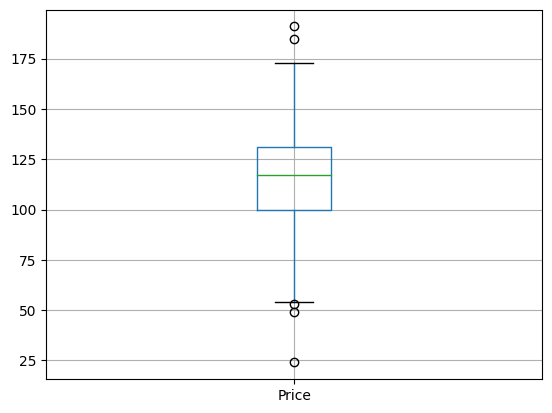

In [213]:
df2.boxplot('Price')
plt.show()

In [214]:
Q3=df2['Price'].quantile(0.75)
Q3

131.0

In [215]:
Q1=df2['Price'].quantile(0.25)
Q1

100.0

In [216]:
IQR=Q3-Q1
IQR

31.0

In [217]:
lower_extreme= Q1-1.5*IQR
lower_extreme

53.5

In [218]:
upper_extreme= Q3+1.5*IQR
upper_extreme

177.5

In [219]:
df2_outliers= df2[(df2['Price']<lower_extreme) | (df2['Price']>upper_extreme)]
df2_outliers

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
42,277,77,69,0,25,24,2,50,18,1,0
125,245,89,78,0,181,49,2,43,15,0,0
165,2,147,58,7,100,191,0,27,15,1,1
174,0,139,24,0,358,185,2,79,15,0,0
367,332,95,106,0,256,53,1,52,17,1,0


In [220]:
df2_no_outliers= df2[(df2['Price']>lower_extreme) & (df2['Price']<upper_extreme)]
df2_no_outliers

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,255,138,73,11,276,120,0,42,17,1,1
1,297,111,48,16,260,83,1,65,10,1,1
2,267,113,35,10,269,80,2,59,12,1,1
3,158,117,100,4,466,97,2,55,14,1,1
4,37,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,320,138,108,17,203,128,1,33,14,1,1
396,114,139,23,3,37,120,2,55,11,0,1
397,159,162,26,12,368,159,2,40,18,1,1
398,106,100,79,7,284,95,0,50,12,1,1


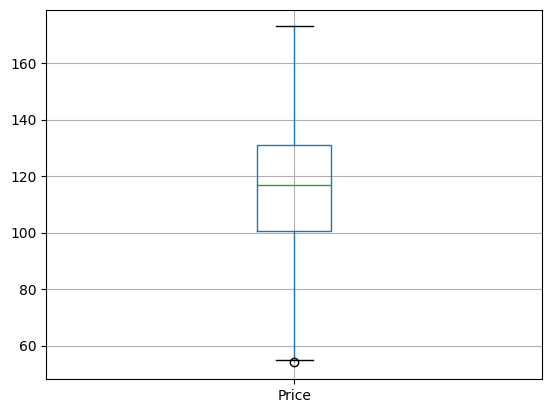

In [221]:
df2_no_outliers.boxplot('Price')
plt.show()

In [222]:
target2=df2_no_outliers[['Sales']]
target2

,Sales
0,255
1,297
2,267
3,158
4,37
...,...
395,320
396,114
397,159
398,106


In [223]:
features2=df2_no_outliers.drop('Sales',axis=1)
features2

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [224]:
features2,target2=make_classification(n_classes=2,n_samples=20,random_state=20)

In [225]:
x_train2,x_test2,y_train2,y_test2=train_test_split(features2,target2,train_size=0.75,random_state=20)

In [226]:
smote2=SMOTE()

In [256]:
x_sampled2,y_sampled2=smote2.fit_resample(x_train2,y_train2)

In [257]:
rand_forest2=RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_split=2)

In [258]:
rand_forest2.fit(x_sampled2,y_sampled2)

RandomForestClassifier(max_depth=3)

In [259]:
y_pred2=rand_forest2.predict(x_sampled2)
y_pred2

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [260]:
accuracy_score(y_sampled2,y_pred2)

1.0

In [261]:
kfold= KFold(n_splits=5,shuffle=True)

In [262]:
for train_split, test_split in kfold.split(features2):
    print(train_split,test_split)

[ 0  1  3  5  6  7  8  9 10 11 13 14 16 17 18 19] [ 2  4 12 15]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 15 17 19] [ 3 14 16 18]
[ 0  1  2  3  4  5  6  7  8 10 12 14 15 16 18 19] [ 9 11 13 17]
[ 1  2  3  4  6  7  8  9 11 12 13 14 15 16 17 18] [ 0  5 10 19]
[ 0  2  3  4  5  9 10 11 12 13 14 15 16 17 18 19] [1 6 7 8]


In [263]:
cross_val_score(rand_forest2,features2,target2,scoring='accuracy',cv=kfold,n_jobs=None).mean()

1.0

##### Bagging

In [264]:
from sklearn.ensemble import BaggingClassifier

In [265]:
bag_clas2= BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=50,bootstrap=True)

In [266]:
bag_clas2.fit(x_sampled2,y_sampled2)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50)

In [267]:
y_pred2=bag_clas2.predict(x_sampled2)
y_pred2

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [268]:
accuracy_score(y_sampled2,y_pred2)

1.0

##### Boosting

In [269]:
from sklearn.ensemble import GradientBoostingClassifier

In [270]:
grad_boost2=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,subsample=1.0)

In [271]:
grad_boost2.fit(x_sampled2,y_sampled2)

GradientBoostingClassifier()

In [272]:
y_pred2=grad_boost2.predict(x_sampled2)
y_pred2

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [273]:
accuracy_score(y_sampled2,y_pred2)

1.0

In [274]:
conf2=confusion_matrix(y_sampled2,y_pred2)
conf2

array([[8, 0],
       [0, 8]])

In [275]:
print(classification_report(y_sampled2,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



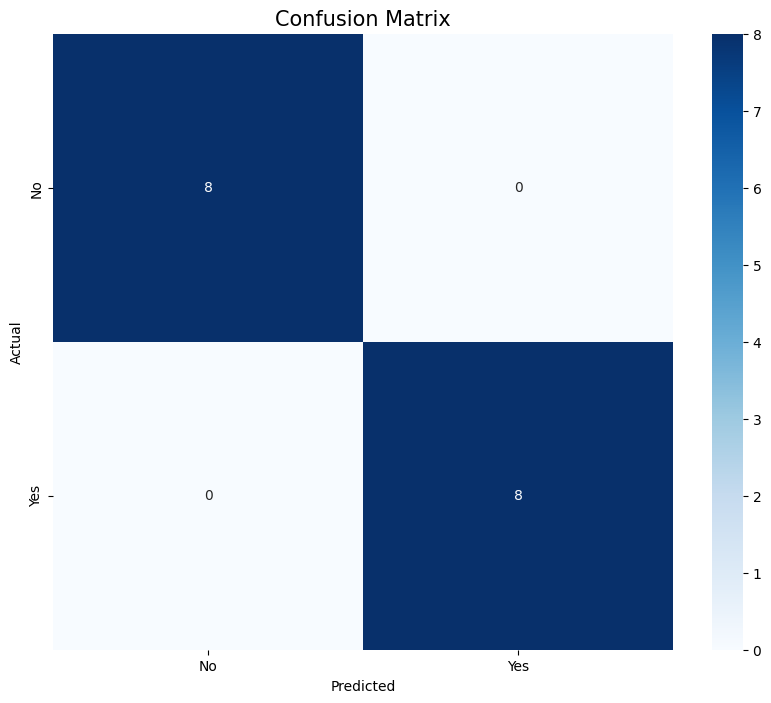

In [276]:
labels = ['No','Yes']
plt.figure(figsize=(10,8))
sns.heatmap(conf2,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted',size=10)
plt.ylabel('Actual',size=10)
plt.title('Confusion Matrix',size=15)
plt.show()

In [277]:
rand_forest2.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=430141094),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1716432480),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1736475592),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=260406599),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1438413714),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=433444383),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1997290278),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1799776291),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=466676191),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1618567417),
 DecisionTreeClassif

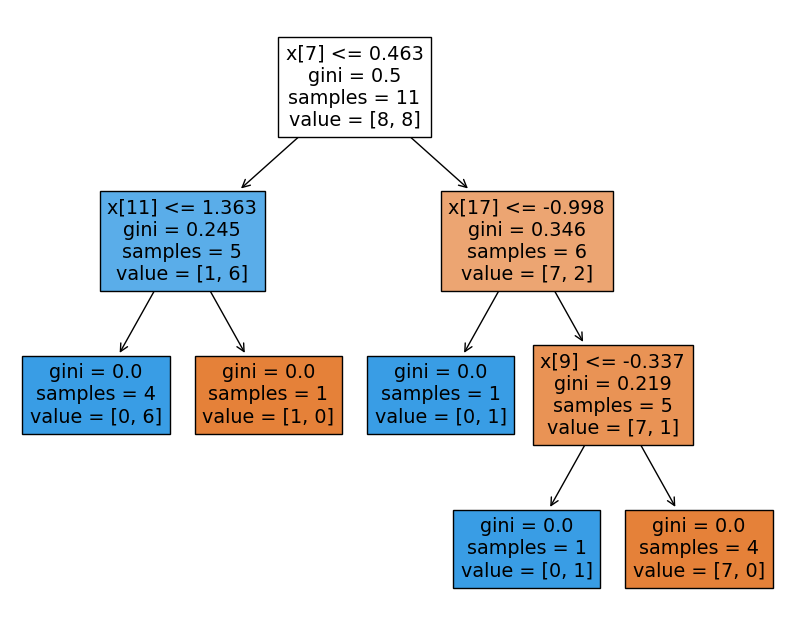

In [278]:
plt.figure(figsize=(10,8))
tree.plot_tree(rand_forest2.estimators_[1],filled=True)
plt.show()

### ROC Curve

In [279]:
fpr,tpr,thresholds=roc_curve(y_sampled2,y_pred2)
roc_auc_score(y_sampled2,y_pred2)

1.0

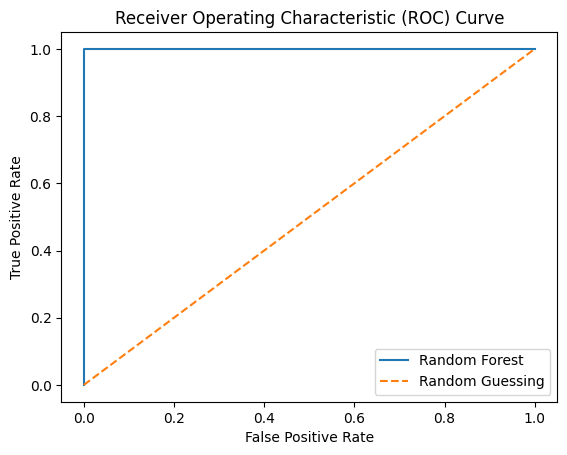

In [280]:
plt.plot(fpr,tpr,label='Random Forest')
plt.plot([0, 1],[0, 1],'--',label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

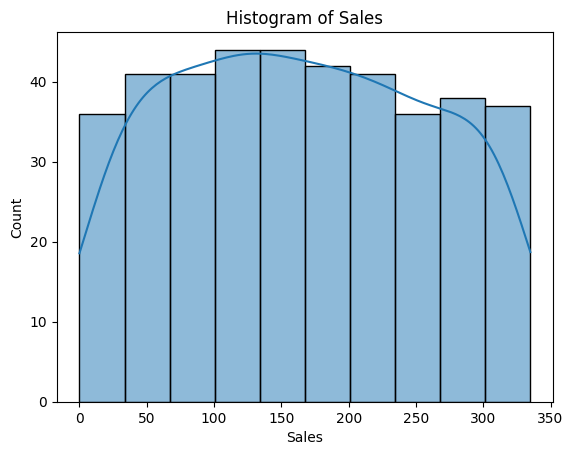

In [281]:
# Histogram
sns.histplot(df2['Sales'],kde=True)
plt.title('Histogram of Sales')
plt.show()

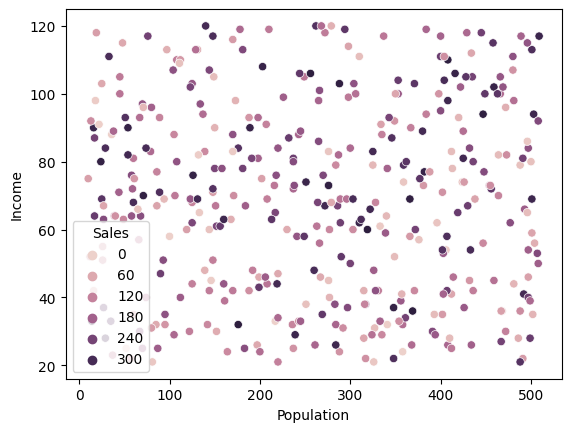

In [282]:
# Scatter plot
sns.scatterplot(data=df2,x='Population',y='Income',hue='Sales')
plt.show()

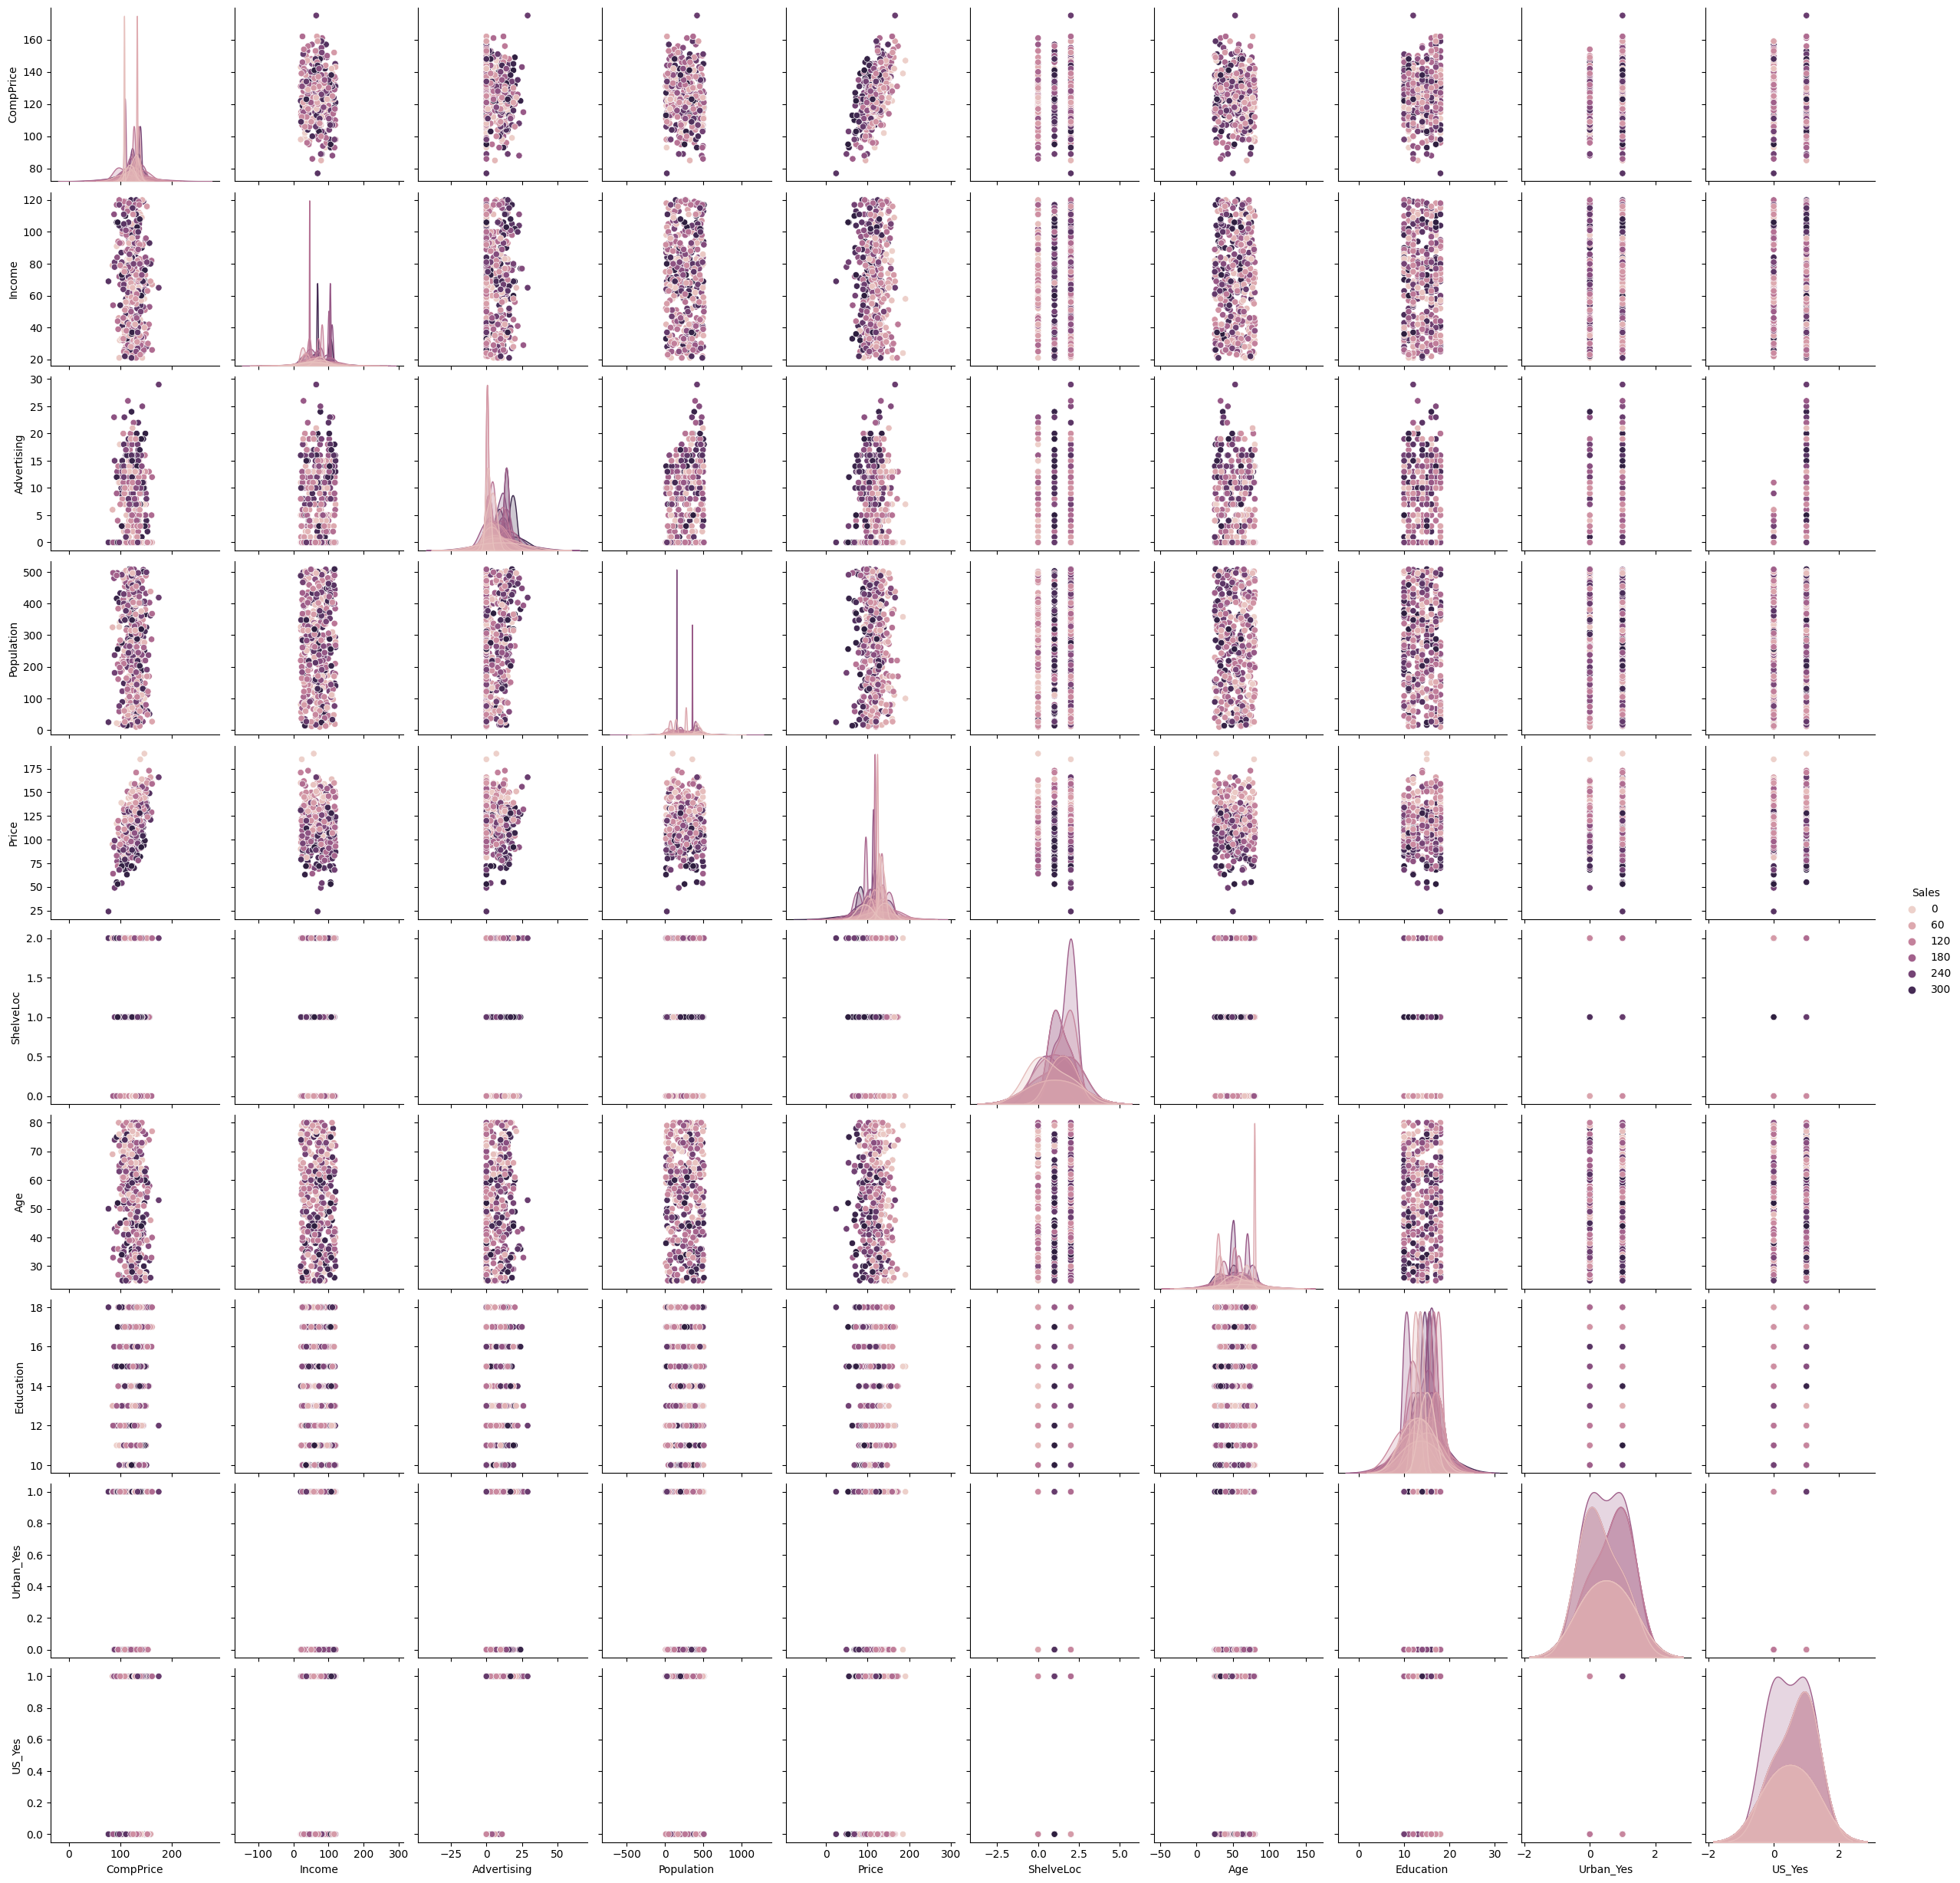

In [283]:
# Pairplot
sns.pairplot(df2,hue='Sales')
plt.show()